In [2]:
import numpy
import matplotlib.pyplot as plt
import math
import random

practical average = 1.9883329797057887
practical dispersion = 4.0057992336659645
chi2 = 0.0015008528340031085
for lambda = 0.5


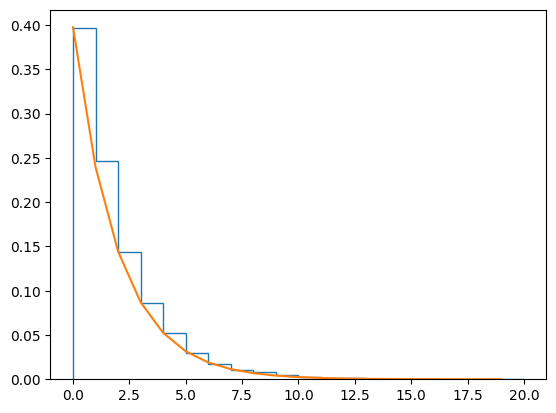

practical average = 0.9967968585835024
practical dispersion = 0.9845437015067273
chi2 = 0.0014357066166156016
for lambda = 1


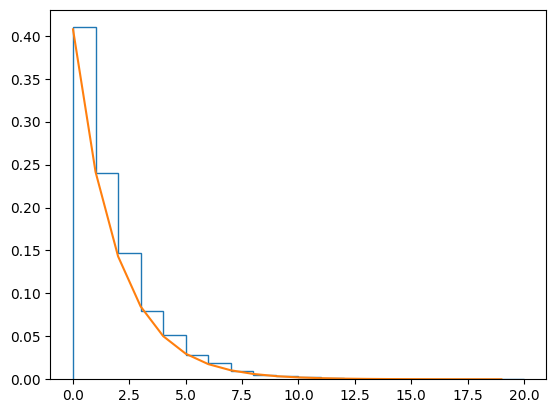

practical average = 0.5007462959518225
practical dispersion = 0.25294873695695574
chi2 = 0.0017634480862291054
for lambda = 2


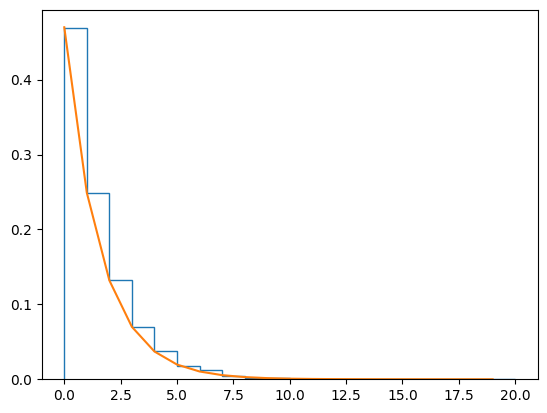

In [3]:
# exponential distribution of random numbers
def exp_dist(x, lambd):
    return -math.log(x) / lambd

# theoretical exponential distribution
def exp_dist_theor(lambd, x):
    return 1 - math.exp(-lambd * x)

AMOUNT_OF_NUMBERS = 10000
LAMBDAS = [0.5, 1, 2]

for lambd in LAMBDAS:
    rand_nums = numpy.random.random(AMOUNT_OF_NUMBERS)
    #rand_nums = [random.random() for i in range(AMOUNT_OF_NUMBERS)]

    prac_nums = [exp_dist(i, lambd) for i in rand_nums]

    # divide into 20 intervals
    min = numpy.min(prac_nums)
    max = numpy.max(prac_nums)
    step = (max - min) / 20

    # build practical distribution
    prac_hist = []
    for i in numpy.arange(min, max, step):
        prac_hist.append(len([j for j in prac_nums if j >= i and j < i+step]) / AMOUNT_OF_NUMBERS)

    # build theoretical distribution
    theor_nums = []
    for i in numpy.arange(min+step, max+step, step):
        theor_nums.append(exp_dist_theor(lambd, i) - exp_dist_theor(lambd, i-step))

    # average
    prac_avg = numpy.average(prac_nums)
    print(f'practical average = {prac_avg}')

    # dispersion
    prac_disp = numpy.var(prac_nums)
    print(f'practical dispersion = {prac_disp}')

    # criterion of Pearson
    chi2 = 0
    for i in range(20):
        chi2 += ((prac_hist[i] - theor_nums[i])**2) / theor_nums[i]
    
    print(f'chi2 = {chi2}')

    # build histogram
    print(f'for lambda = {lambd}')
    plt.stairs(prac_hist, label='practical')    
    plt.plot(theor_nums, label='theoretical')
    plt.show()

